In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
def to_timestamp(value):
    return pd.Timestamp(value, unit='s')


def parse_flags(value):
    return value.strip().split('|')

In [3]:
def plot(**kwargs):
    fig, ax = plt.subplots(1, 1, figsize=(16, 9), constrained_layout=True)
    ax.xaxis.set_major_locator(mdates.DayLocator())
    #ax.xaxis.set_minor_locator(mdates.HourLocator())
    ax.grid(True)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%A %d'))
    #ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H'))
    if 'title' in kwargs:
        plt.title(kwargs['title'])
    if 'xlabel' in kwargs:
        ax.set_ylabel(kwargs['xlabel'])
    if 'ylabel' in kwargs:
        ax.set_ylabel(kwargs['ylabel'])
    
    data, x, y = kwargs.get('data'), kwargs.get('x'), kwargs.get('y')
    if isinstance(y, str):
        y = {y: y}
    for key, value in y.items():
        if 'by' in kwargs:
            for catg in data[kwargs['by']].unique():
                ax.plot(x, value, data=data[data[kwargs['by']] == catg], label=str(catg))
        else:
            ax.plot(x, value, data=data, label=key)
    if 'by' in kwargs or len(y) > 1:
        ax.legend()
    if 'path' in kwargs:
        plt.savefig(kwargs['path'], bbox_inches='tight')
    plt.show()

In [4]:
df = pd.read_csv('data.csv')

In [5]:
df.head()

,nickname,read_time,pub_time,ip,or_port,dir_port,bandwidth,flags
0,Unnamed,1.637989e+09,1.637917e+09,51.255.86.130,443,0,160000,Fast|Guard|HSDir|Running|Stable|V2Dir|Valid
1,poiuty,1.637989e+09,1.637964e+09,116.202.155.223,443,0,160000,Fast|Guard|HSDir|Running|Stable|V2Dir|Valid
2,3,1.637989e+09,1.637960e+09,185.31.175.220,9001,0,140000,Exit|Fast|Guard|Running|Stable|V2Dir|Valid
3,torsethforprivacy,1.637989e+09,1.637960e+09,5.9.120.18,443,0,140000,Fast|Guard|HSDir|Running|Stable|V2Dir|Valid
4,12,1.637989e+09,1.637960e+09,185.31.175.215,9001,0,140000,Exit|Fast|Guard|Running|Stable|V2Dir|Valid


In [6]:
df_types = {
    'nickname': 'string',
    'ip': 'string',
    'read_time': to_timestamp,
    'pub_time': to_timestamp,
    'or_port': 'UInt16',
    'dir_port': 'UInt16',
    'bandwidth': 'UInt32',
    'flags': parse_flags
}
for column, dtype in df_types.items():
    if isinstance(dtype, str):
        df[column] = df[column].astype(dtype)
    else:
        df[column] = df[column].apply(dtype)

df.sort_values(by=['read_time', 'pub_time'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25452 entries, 1339 to 19705
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   nickname   25452 non-null  string        
 1   read_time  25452 non-null  datetime64[ns]
 2   pub_time   25452 non-null  datetime64[ns]
 3   ip         25452 non-null  string        
 4   or_port    25452 non-null  UInt16        
 5   dir_port   25452 non-null  UInt16        
 6   bandwidth  25452 non-null  UInt32        
 7   flags      25452 non-null  object        
dtypes: UInt16(2), UInt32(1), datetime64[ns](2), object(1), string(2)
memory usage: 1.4+ MB


In [7]:
df.head()

,nickname,read_time,pub_time,ip,or_port,dir_port,bandwidth,flags
1339,Unnamed,2021-11-27 03:00:03,2021-11-26 06:21:56,51.91.73.194,9001,9030,100000,"[Fast, Guard, HSDir, Running, Stable, V2Dir, V..."
1332,arbertDelroth,2021-11-27 03:00:03,2021-11-26 06:22:15,212.51.139.36,143,0,110000,"[Fast, Running, V2Dir, Valid]"
1408,porthill,2021-11-27 03:00:03,2021-11-26 06:27:21,136.243.176.148,443,80,74000,"[Fast, Guard, HSDir, Running, Stable, V2Dir, V..."
1335,Silverwing,2021-11-27 03:00:03,2021-11-26 06:52:05,178.254.22.21,443,0,110000,"[Fast, Guard, HSDir, Running, Stable, V2Dir, V..."
1355,Unnamed,2021-11-27 03:00:03,2021-11-26 06:57:01,5.39.73.41,443,80,89000,"[Fast, Guard, HSDir, Running, Stable, V2Dir, V..."


In [16]:
gf = df.groupby(by='read_time').agg({'bandwidth': [np.average, np.min, np.max, np.median]}).reset_index()

In [17]:
gf.head()

read_time     bandwidth                        
                            average   amin    amax   median
0 2021-11-27 03:00:03  94600.000000  72000  160000  86000.0
1 2021-11-27 04:00:05  94498.019802  72000  160000  86000.0
2 2021-11-27 05:00:02  94674.257426  72000  160000  86000.0
3 2021-11-27 06:00:08  94742.574257  73000  160000  86000.0
4 2021-11-27 07:00:08  95085.148515  74000  160000  86000.0

In [20]:
gf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   (read_time, )         252 non-null    datetime64[ns]
 1   (bandwidth, average)  252 non-null    float64       
 2   (bandwidth, amin)     252 non-null    UInt32        
 3   (bandwidth, amax)     252 non-null    UInt32        
 4   (bandwidth, median)   252 non-null    Float64       
dtypes: Float64(1), UInt32(2), datetime64[ns](1), float64(1)
memory usage: 8.7 KB


ValueError: Unrecognized character i in format string

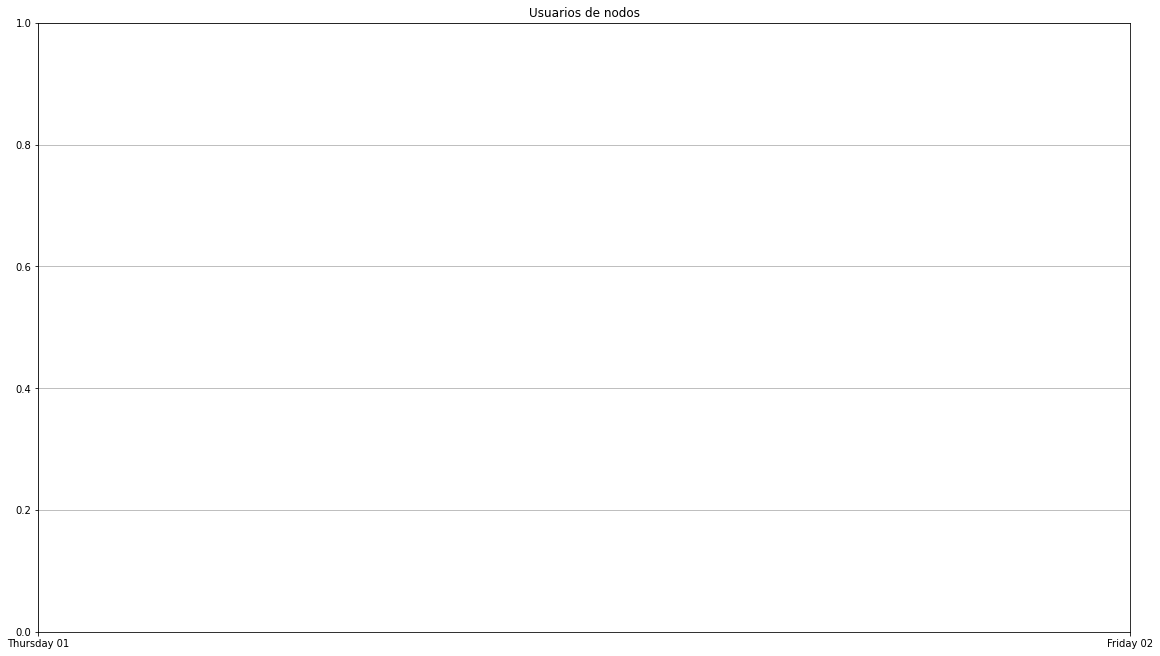

In [19]:
plot(data=gf, x='read_time', y='min', title='Usuarios de nodos')